[View in Colaboratory](https://colab.research.google.com/github/wo1ever/TIL/blob/master/index.ipynb)

# [Pandas10분 완성](https://pandas.pydata.org/pandas-docs/stable/10min.html)

>[Pandas10분 완성](#scrollTo=JZPw4_3Rox2g)

>[Object Creation (객체 생성)](#scrollTo=X9rrAHzu2Vab)

>>>>>[IPython에서 실행하면 다음과 같은 결과값이 나온다.](#scrollTo=Itt3P3rQ5DV-)

>[Viewing Data](#scrollTo=lkJcyM0ILNgT)

>[Selection](#scrollTo=a9QohIjc5u-w)

>>[Getting](#scrollTo=EYxliIZ65yee)

>>[Selection by Label](#scrollTo=wtaJHua451UZ)

>>[Selection by Position](#scrollTo=PrWrPP-K55Xe)

>>[Boolean Indexing](#scrollTo=zUrHp9AsLNix)

>>>[<부울 인덱싱>](#scrollTo=dr9ikZ_cLNix)

>>>>[선택한 데이터에 단일 열의 값을 사용한다.](#scrollTo=4H2VjFy4LNiy)

>>>>[부울 조건에 충족되는 데이터프레임에서 변수를 선택한다.](#scrollTo=K2OHkZhjLNi0)

>>>>[필터링 방법인 isin()을 사용한다.](#scrollTo=B5Ywfi9MLNi7)

>>[Setting](#scrollTo=wx97sAGp6OEj)

>[Missing Data](#scrollTo=f7mkUirR5hit)

>[Operations (오퍼레이션)](#scrollTo=_Vtbv3Am59wL)

>>[Stats](#scrollTo=mcVNuuy_5_wW)

>>[Apply (적용하기)](#scrollTo=R7jzj-cH6Ahc)

>>[Histogramming (히스토그래밍)](#scrollTo=UyvQC_nC6S6g)

>>[String Mathods (문자열 메서드)](#scrollTo=WsQyIOdF6aPw)

>>[Apply](#scrollTo=905UN_JaLNhl)

>>[Histogramming](#scrollTo=lawpGLWDLNhq)

>>[String Methods](#scrollTo=nrdgULcJ4XL6)

>[Selection (선택)](#scrollTo=3Gqmfx7oox22)

>>[Getting (데이터 얻기)](#scrollTo=DeXaTXAdp6ne)

>>[Selection by Label (Label 을 통한 선택)](#scrollTo=izNpv79bsGV7)

>>[Selection by Position (위치로 선택하기)](#scrollTo=v7BFmgcRLNif)

>>[Setting](#scrollTo=qTihaKMQLNjE)

>[Merge](#scrollTo=-NpTTJzF34oe)

>>[Concat](#scrollTo=fZWj-N4CLNig)

>>[Join](#scrollTo=7IBM0m8GLNjX)

>>[Append](#scrollTo=9-CsJ6kHLNjc)

>[객체생성](#scrollTo=NXTbZ7s0LNjr)

>[Grouping](#scrollTo=6VaJ6ty_3v09)

>[Reshaping](#scrollTo=7tWQKNsJ3JeY)

>>[Stack](#scrollTo=gZJGxemv3WWA)

>>[Pivot Tables](#scrollTo=RZ_-viV34FE-)

>[Time Series](#scrollTo=ZYenx0CU2Lvc)

>[Categoricals](#scrollTo=8OfzvbgW28Hc)

>[Plotting](#scrollTo=LDarUbRI1K9c)

>[Getting Data In/Out](#scrollTo=6orrhxzC2vJh)

>>[CSV](#scrollTo=bYZJgW252vq2)

>>[HDF5](#scrollTo=P9knaZtu24Nj)

>>[Excel](#scrollTo=PPEdwZcg3AHk)

>[Gotchas](#scrollTo=fBibp76_3IjV)



# 새 섹션

이 소개서는 주로 신규 사용자를 대상으로 한 판다스에 대한 간략한 소개입니다. 더 복잡한 방법은 [Cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 에서 볼 수 있습니다.


일반적으로 다음과 같이 가져옵니다.

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

# Object Creation (객체 생성)

[데이터 구조 소개 섹션](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)을 참조하십시오.

판다스는 값을 가지고 있는 리스트를 통해 [시리즈](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series)를 만들고, 인덱스를 기본값으로 불러올 것입니다.

In [0]:
s = pd.Series([1,3,5,np.nan,6,8])

In [8]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열이있는 NumPy 배열을 전달하여 데이터 프레임 만들기 :

In [0]:
dates = pd.date_range('20130101', periods=6)

In [10]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [0]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [12]:
df

A         B         C         D
2013-01-01  1.879097  0.489034  2.829889  0.060681
2013-01-02 -1.883749 -2.935576  0.467436 -0.257971
2013-01-03  1.955703 -1.980915  0.886641  1.580227
2013-01-04 -0.131587 -0.757510  1.055614  0.180451
2013-01-05 -0.934099 -1.111522 -1.547811  0.044521
2013-01-06  0.582029  0.330368  0.933039 -0.430083

시리즈와 같은 것으로 바뀔 수 있는 객체의 dict로 구성된 dataframe을 만듭니다.

In [0]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

In [12]:
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

 DataFrame 결과의 행은 다양한 데이터타입(dtypes)으로 구성됩니다.  

In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython을 이용하고 계시다면, 열 이름에 대한(공용속성은 물론) tap완성 기능(tap completion)이 자동으로 활성화됩니다. 다음은 완성될 속성에 대한 부분집합(subset)입니다. 

In [14]:
df2.<TAB>

SyntaxError: ignored

##### IPython에서 실행하면 다음과 같은 결과값이 나온다.
```
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.D
```



보시다시피, A,B,C그리고 D 열이 탭 자동완성기능으로 실행됩니다. 물론 E도 있습니다. 나머지 속성들은 간결하게 잘라버렸습니다. 


# Viewing Data
1조: 처음~22번 

**Viewing Data 데이터 확인하기**

[Basic Section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics)을 봅니다.

데이터프레임의 맨 윗 줄과 마지막 줄을 확인하고 싶을 때 .head()와 .tail()을 입력합니다. 

괄호()안에는 숫자가 들어갈 수도 있고 안 들어갈 수도 있습니다. 
숫자가 들어간다면, 윗/마지막 줄의 특정 줄을 불러올 수 있습니다. 
숫자가 들어가지 않다면, 기본값인 5로 처리됩니다.

(예시) 
df.tail(3) - 끝에서 마지막 3줄을 불러옴
df.tail() - 끝에서 마지막 5줄 불러옴

In [0]:
df.head()

A         B         C         D
2013-01-01 -0.414296 -0.197622 -1.085198 -0.023086
2013-01-02  1.310316 -1.236729  2.279797 -1.959987
2013-01-03  0.723715  0.573125 -1.069190  1.555839
2013-01-04  0.371333 -0.613136 -0.128201  0.211691
2013-01-05 -1.711670 -1.473291  0.996679  0.299594

In [17]:
df.tail(3)

A         B         C         D
2013-01-04  1.509731 -1.800477 -1.223772 -0.272443
2013-01-05  0.149121  0.466604 -1.467452  0.739277
2013-01-06  0.337573  0.828969  1.369278 -0.305797

인덱스(Index), 열(Column) 그리고 NumPy 데이터에 대한 세부 정보를 보려면 .index, .columns, .values를 입력합니다. 


In [18]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [0]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [0]:
df.values

array([[-0.41429646, -0.19762242, -1.08519754, -0.02308603],
       [ 1.31031598, -1.23672901,  2.27979739, -1.95998692],
       [ 0.72371532,  0.5731255 , -1.06918956,  1.55583868],
       [ 0.37133325, -0.61313642, -0.12820145,  0.21169111],
       [-1.71166962, -1.47329121,  0.99667917,  0.29959364],
       [ 0.64706968, -0.05617486, -1.39994375, -0.4958439 ]])

데이터의 대략적인 통계적 정보를 보려면 [describe() ](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe)를 입력합니다.  


In [0]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.154411 -0.500638 -0.067676 -0.068632
std    1.072910  0.767186  1.446407  1.150207
min   -1.711670 -1.473291 -1.399944 -1.959987
25%   -0.217889 -1.080831 -1.081196 -0.377654
50%    0.509201 -0.405379 -0.598696  0.094303
75%    0.704554 -0.091537  0.715459  0.277618
max    1.310316  0.573125  2.279797  1.555839

데이터를 전치합니다.

In [14]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.016348    0.923949   -0.740104    1.509731    0.149121    0.337573
B   -1.039512   -0.600859    0.415755   -1.800477    0.466604    0.828969
C    2.217217   -0.046872    0.952118   -1.223772   -1.467452    1.369278
D    0.349947   -1.890090   -0.591175   -0.272443    0.739277   -0.305797

축 별로 정렬합니다.

In [15]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01  0.349947  2.217217 -1.039512 -0.016348
2013-01-02 -1.890090 -0.046872 -0.600859  0.923949
2013-01-03 -0.591175  0.952118  0.415755 -0.740104
2013-01-04 -0.272443 -1.223772 -1.800477  1.509731
2013-01-05  0.739277 -1.467452  0.466604  0.149121
2013-01-06 -0.305797  1.369278  0.828969  0.337573

값 별로 정렬합니다.

In [16]:
df.sort_values(by='B')

A         B         C         D
2013-01-04  1.509731 -1.800477 -1.223772 -0.272443
2013-01-01 -0.016348 -1.039512  2.217217  0.349947
2013-01-02  0.923949 -0.600859 -0.046872 -1.890090
2013-01-03 -0.740104  0.415755  0.952118 -0.591175
2013-01-05  0.149121  0.466604 -1.467452  0.739277
2013-01-06  0.337573  0.828969  1.369278 -0.305797

# Selection (선택)


주석(Note) : 선택과 설정을 위한 Python, Numpy의 표준화된 표현들이 직관적이며, 코드 작성을 위한 양방향 작업에 유용하지만 우리는 Pandas에 최적화된 데이터 접근 방법인 .at, .iat, .loc 및 .iloc. 을 추천합니다. 

[데이터 인덱싱 및 선택](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) 문서와 [다중 인덱싱 / 심화 인덱싱](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced) 문서를 확인하십시오.

## Getting (데이터 얻기)

df.A 와 동일한 Series를 생성하는 단일 열을 선택합니다.

In [0]:
df['A']

2013-01-01    0.395799
2013-01-02   -0.303496
2013-01-03    0.677687
2013-01-04   -1.109111
2013-01-05   -0.223322
2013-01-06    0.623582
Freq: D, Name: A, dtype: float64

행을 분할하는 [] 를 통해 선택합니다

In [0]:
df[0:3]

A         B         C         D
2013-01-01  0.395799  1.324341  0.153554 -0.672920
2013-01-02 -0.303496 -1.596556 -0.920610 -0.840386
2013-01-03  0.677687  0.204407  0.256671 -1.094652

In [0]:
df['20130102':'20130104']

A         B         C         D
2013-01-02 -0.303496 -1.596556 -0.920610 -0.840386
2013-01-03  0.677687  0.204407  0.256671 -1.094652
2013-01-04 -1.109111 -0.770913 -0.330677 -0.570009

## Selection by Label (Label 을 통한 선택)

[Label을 통한 선택](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)에서 더 많은 내용을 확인하세요.

라벨을 사용하여 횡단면을 얻는 방법입니다.

In [0]:
df.loc[dates[0]]

A    0.395799
B    1.324341
C    0.153554
D   -0.672920
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 여러 축(의 데이터)을 얻는 방법입니다.

In [0]:
df.loc[:,['A','B']]

A         B
2013-01-01  0.395799  1.324341
2013-01-02 -0.303496 -1.596556
2013-01-03  0.677687  0.204407
2013-01-04 -1.109111 -0.770913
2013-01-05 -0.223322  0.305182
2013-01-06  0.623582  0.705459

양쪽 종단점을 포함한 라벨 슬라이싱을 봅시다.

In [0]:
df.loc['20130102':'20130104', ['A','B']]

A         B
2013-01-02 -0.303496 -1.596556
2013-01-03  0.677687  0.204407
2013-01-04 -1.109111 -0.770913

반환되는 객체의 크기를 줄입니다.

In [0]:
df.loc['20130102',['A','B']]

A   -0.303496
B   -1.596556
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻습니다.

In [0]:
df.loc[dates[0],'A']

0.39579879602076895

스칼라 값을 더 빠르게 구하는 방법입니다. (앞선 method와 동일합니다)

In [0]:
df.at[dates[0],'A']

0.39579879602076895

## Selection by Position (위치로 선택하기)

자세한 내용은 [위치로 선택하기](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)를 참고해주세요.

넘겨받은 정수의 위치로 선택하기:

In [1]:
df.iloc[3]

NameError: ignored

넘파이/파이썬 작동 방식처럼 정수로 표기된 슬라이스로 선택하기:

In [0]:
df.iloc[3:5,0:2]

넘파이/파이썬 작동 방식처럼 정수로 표기된 위치값을 기반으로 선택하기:

In [0]:
df.iloc[[1,2,4],[0,2]]

행만 나누고 싶을 때:

In [0]:
df.iloc[1:3,:]

열만 나누고 싶을 때:

In [0]:
df.iloc[:,1:3]

값만 얻고 싶을 때:

In [0]:
df.iloc[1,1]

스칼라 값을 빨리 얻고 싶을 때(위 방식과 동일):

In [0]:
df.iat[1,1]

## Boolean Indexing (부울인덱싱)

선택한 데이터에 단일 열의 값을 사용합니다.

In [1]:
df[df.A > 0]

NameError: ignored

부울 조건에 충족되는 데이터프레임에서 변수를 선택합니다.

In [2]:
df[df > 0]

NameError: ignored

필터링 방법인 [isin()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html#pandas.Series.isin)을 사용합니다.

In [3]:
df2 = df.copy()

NameError: ignored

In [6]:
df2['E'] = ['one', 'one','two','three','four','three']

NameError: ignored

In [7]:
df2

NameError: ignored

In [8]:
df2[df2['E'].isin(['two','four'])]

NameError: ignored

## Setting (설정)
새로운 열을 날짜와 인덱스에 따라 자동적으로 줄이 맞춰지도록 설정합니다. 

In [0]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [0]:
s1

In [0]:
df['F'] = s1


라벨에 따라 값을 설정하고 싶다면 :

In [0]:
df.at[dates[0],'A'] = 0

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

위치에 따라 값을 설정하고 싶다면 :

In [0]:
df.iat[0,1] = 0

Numpy 배열로 할당하고 싶다면  :

In [0]:
df.loc[:,'D'] = np.array([5] * len(df))

위 설정대로 작동한 결과입니다.

In [0]:
df

A         B         C         D
2013-01-01 -1.479995  0.361202  1.486119  0.115256
2013-01-02 -0.221067  0.487654  0.938039 -0.741746
2013-01-03  0.729247 -0.215760  0.337932 -1.177466
2013-01-04  0.847000 -0.118338  0.038752 -0.727101
2013-01-05 -0.239768 -0.581571  0.884636  0.134043
2013-01-06  0.204809 -0.082419  0.846424 -0.720843

설정된 where 작업입니다.

In [0]:
df2 = df.copy()

In [0]:
df2[df2 > 0] = -df2

In [0]:
df2

# Missing Data(결측치)

pandas는 missing data(결측치)를 표현하기 위해 주로 np.nan 값을 사용합니다. 이 방법은 default(기본 설정)이지만 계산에는 포함되지 않습니다. [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)을 참조하십시오.




Reindexing으로 지정된 축을 변경/추가/삭제할 수 있습니다. Reindexing은 데이터 복사본을 반환합니다.

In [0]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [0]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [0]:
df1

missing data(결측치)를 갖고 있는 행들을 지웁니다.

In [0]:
df1.dropna(how='any')

missing data(결측치)를 채웁니다.

In [0]:
df1.fillna(value=5)

값이 nan인 boolean mask 얻습니다.

In [0]:
pd.isna(df1)

# Operation (연산)

[바이너리 작업의 기본 섹션](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)을 참조하십시오.

## Stats(통계)

일반적으로 연산은 missing data(결측치)를 제외합니다.

서술적인 통계를 수행합니다.

In [0]:
df.mean()

다른 축에서 동일한 작업을 수행합니다.

In [0]:
df.mean(1)

차원이 다르고 정렬이 필요한 객체로 작업합니다. 또한 pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅(역주 : broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.)됩니다.

In [0]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [0]:
s

In [0]:
df.sub(s, axis='index')

## Apply (적용하기)

데이터에 기능을 적용합니다.

In [0]:
df.apply(np.cumsum)

In [0]:
df.apply(lambda x: x.max() - x.min())

## Histogramming (히스토그래밍)

더 많은 내용은 [Histogramming and Discretization (히스토그래밍과 이산화)](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)항목을 참조하십시오.

In [0]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [0]:
s

In [0]:
s.value_counts()

## String Mathods (문자열 메서드)

Series 는 아래의 코드 스니펫에서처럼 배열의 각 요소를 쉽게 조작할 수 있도록 하는 문자열 처리 메서드 세트를 갖추고 있습니다. 주로 문자열에서의 패턴 매칭은 자동으로 [regular expressions (정규식)](https://docs.python.org/3/library/re.html)을 사용한다는 것을 유의하십시오. (그리고 가끔 어떤 경우에는 항상 정규식을 사용합니다.) 

더 많은 내용은 [Vectorized String Methods (벡터화된 문자열 메서드)](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods) 항목을 참조하십시오. 

In [0]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [0]:
s.str.lower()

In [0]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [0]:
df

In [0]:
df['F'] = s1

# Merge

## Concat

Pandas는 join/merge 와 같은 병합작업의 경우 'concat()' 을 통해<br>
Series, DataFrame, Panel 객체를 index와 관계 대수 기능에 대한 다양한 유형의 논리로<br>
손쉽게 결합할 수 있는 다양한 기능을 제공합니다.

Merging 섹션을 봅시다. [Merging section](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) 

'concat()'으로 Pandas 객체를 연결(concatenating) 합니다. 

In [0]:
df = pd.DataFrame(np.random.randn(10, 4))

In [7]:
df

0         1         2         3
0  0.129203 -0.237727 -0.769031 -1.964273
1  1.040888  1.448563 -0.984106 -0.099231
2 -0.722966 -1.198605 -0.477420 -0.265710
3 -0.005394  0.286019  0.730833 -0.473830
4  1.231130 -1.574169  0.781478 -0.159057
5 -1.417875 -0.247297 -0.580590  1.369179
6 -0.905663  0.641291  0.266012 -0.474489
7  0.196629  1.592408  0.017062 -1.300836
8  0.034225  0.032075 -1.876997 -1.712954
9  0.399283  0.087454 -0.134279 -1.936356

In [8]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

0         1         2         3
0  0.129203 -0.237727 -0.769031 -1.964273
1  1.040888  1.448563 -0.984106 -0.099231
2 -0.722966 -1.198605 -0.477420 -0.265710
3 -0.005394  0.286019  0.730833 -0.473830
4  1.231130 -1.574169  0.781478 -0.159057
5 -1.417875 -0.247297 -0.580590  1.369179
6 -0.905663  0.641291  0.266012 -0.474489
7  0.196629  1.592408  0.017062 -1.300836
8  0.034225  0.032075 -1.876997 -1.712954
9  0.399283  0.087454 -0.134279 -1.936356

In [0]:
df.iloc[:,1:3]

B         C
2013-01-01  1.324341  0.153554
2013-01-02 -1.596556 -0.920610
2013-01-03  0.204407  0.256671
2013-01-04 -0.770913 -0.330677
2013-01-05  0.305182 -1.508353
2013-01-06  0.705459  0.369007

## Join
SQL 방식으로 merge합니다. [Database style joining](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join) 섹션을 참고하세요.


In [0]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [0]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [10]:
left

key  lval
0  foo     1
1  foo     2

In [11]:
right

key  rval
0  foo     4
1  foo     5

In [15]:
pd.merge(left, right, on= 'key')

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

이와 같은 다른 예시는 :

In [0]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})

In [0]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [20]:
left

key  lval
0  foo     1
1  bar     2

In [21]:
right 

key  rval
0  foo     4
1  bar     5

In [22]:
pd.merge(left, right, on= 'key')

key  lval  rval
0  foo     1     4
1  bar     2     5

## Append

데이터프레임에 하나, 혹은 여러 개의 행을 추가합니다. [Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation) 섹션을 참조하시기 바랍니다.

In [0]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [0]:
df

In [0]:
s = df.iloc[3]

In [0]:
df.append(s, ignore_index=True)

# Grouping




**그룹화**는 다음 단계 중 하나 이상을 포함하는 프로세스를 나타냅니다.

- 어떤 기준에 따라 여러 그룹으로 **데이터 분할(Splitting)**
- 각 그룹에 독립적으로 함수(function) **적용(Applying)**
- 결과물들을 하나의 자료구조로  **결합(Combining)**

자세한 내용은 [그룹화 ](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)섹션을 참조하십시오.

In [0]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })

In [7]:
df

A      B         C         D
0  foo    one  0.056468 -1.700804
1  bar    one -0.223937 -0.448887
2  foo    two  0.328946 -0.401242
3  bar  three  1.023657  0.246377
4  foo    two  0.988012  0.965924
5  bar    two -0.170186 -0.557526
6  foo    one -0.808825 -1.947245
7  foo  three  0.216881  1.028468

생성된 데이터프레임을 **그룹화**한 후 각 그룹에 [sum()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html#pandas.DataFrame.sum) 함수를 **적용**합니다.

In [8]:
df.groupby('A').sum()

C         D
A                      
bar  0.629535 -0.760035
foo  0.781481 -2.054898

여러 열을 기준으로 **그룹화**하면 계층적 index가 형성됩니다. 여기에도 sum 함수를 **적용** 할 수 있습니다.

In [9]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.223937 -0.448887
    three  1.023657  0.246377
    two   -0.170186 -0.557526
foo one   -0.752358 -3.648049
    three  0.216881  1.028468
    two    1.316958  0.564682

# Reshaping

[계층적 인덱싱](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) 및 [변형](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking)에 대한 섹션을 참조하십시오.






## Stack

In [0]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [0]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [0]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [0]:
df2  =  df[:4]

In [57]:
df2

A         B
first second                    
bar   one    -0.195358  0.750044
      two    -0.104833 -1.433699
baz   one    -0.113793 -0.954064
      two    -2.333533  0.042629

[stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) 메서드는 DataFrame 열들의 레벨을 "압축"합니다.

In [0]:
stacked = df2.stack()

In [59]:
stacked

first  second   
bar    one     A   -0.195358
               B    0.750044
       two     A   -0.104833
               B   -1.433699
baz    one     A   -0.113793
               B   -0.954064
       two     A   -2.333533
               B    0.042629
dtype: float64

"Stacked" DataFrame 또는 Series (MultiIndex를 인덱스로 사용) 인 경우 [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack)의 역 연산은 [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack)이며, 기본적으로 마지막 레벨을 unstack합니다.

In [60]:
stacked.unstack()

A         B
first second                    
bar   one    -0.195358  0.750044
      two    -0.104833 -1.433699
baz   one    -0.113793 -0.954064
      two    -2.333533  0.042629

In [29]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.875011 -1.556174
      B  1.395960 -0.659940
baz   A -0.104231 -0.436920
      B  2.667967 -1.299129
foo   A  1.790953  0.978248
      B -0.232506 -0.547802
qux   A  0.980380 -0.387887
      B  0.290200 -0.116857

In [61]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.195358 -0.113793
       B  0.750044 -0.954064
two    A -0.104833 -2.333533
       B -1.433699  0.042629

## Pivot Tables

피벗 테이블 섹션을 참조하십시오.

In [0]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [63]:
df

A  B    C         D         E
0     one  A  foo  0.988377  0.841519
1     one  B  foo  0.650030 -1.278552
2     two  C  foo -0.572768 -0.113546
3   three  A  bar -0.917207 -0.605644
4     one  B  bar  0.041252  0.490003
5     one  C  bar  0.006014 -1.556474
6     two  A  foo -1.395743 -0.194504
7   three  B  foo -1.273224  0.849112
8     one  C  foo  0.532535 -0.997676
9     one  A  bar  0.139564 -2.028593
10    two  B  bar -0.873256  0.202317
11  three  C  bar -0.821394  1.874484

이 데이터에서 피벗 테이블을 매우 쉽게 생성 할 수 있습니다.

In [64]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.139564  0.988377
      B  0.041252  0.650030
      C  0.006014  0.532535
three A -0.917207       NaN
      B       NaN -1.273224
      C -0.821394       NaN
two   A       NaN -1.395743
      B -0.873256       NaN
      C       NaN -0.572768

# Time Series

pandas는 리샘플링 작업을 수행하기 위해 간단하고, 강력하며 효율적인 기능을 제공합니다(예 : 2차 자료를 5-minutely 데이터로 변환). 이는 재무 애플리케이션에서 매우 일반적이지만 이에 국한되지 않습니다. [Time Series(시계열) 섹션](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)을 참고하세요.

In [0]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [0]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [67]:
ts.resample('5Min').sum()

2012-01-01    24266
Freq: 5T, dtype: int64

시간대를 표현합니다 :

In [0]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [0]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [74]:
ts

2012-03-06   -0.823286
2012-03-07   -0.411211
2012-03-08   -0.373167
2012-03-09   -0.296496
2012-03-10    0.669600
Freq: D, dtype: float64

In [0]:
ts_utc = ts.tz_localize('UTC')

In [72]:
ts_utc

2012-03-06 00:00:00+00:00   -0.823286
2012-03-07 00:00:00+00:00   -0.411211
2012-03-08 00:00:00+00:00   -0.373167
2012-03-09 00:00:00+00:00   -0.296496
2012-03-10 00:00:00+00:00    0.669600
Freq: D, dtype: float64

다른 시간대로 변환을 시행합니다 :

In [73]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.823286
2012-03-06 19:00:00-05:00   -0.411211
2012-03-07 19:00:00-05:00   -0.373167
2012-03-08 19:00:00-05:00   -0.296496
2012-03-09 19:00:00-05:00    0.669600
Freq: D, dtype: float64

시간 범위 표현 간에 변환을 시행합니다 :

In [0]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [0]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [45]:
ts

2012-01-31   -0.421486
2012-02-29   -0.184594
2012-03-31   -0.117843
2012-04-30   -0.126489
2012-05-31   -0.351443
Freq: M, dtype: float64

In [0]:
ps = ts.to_period()

In [47]:
ps

2012-01   -0.421486
2012-02   -0.184594
2012-03   -0.117843
2012-04   -0.126489
2012-05   -0.351443
Freq: M, dtype: float64

In [48]:
ps.to_timestamp()

2012-01-01   -0.421486
2012-02-01   -0.184594
2012-03-01   -0.117843
2012-04-01   -0.126489
2012-05-01   -0.351443
Freq: MS, dtype: float64

기간과 타임 스탬프를 변환하면 편리한 산술 기능을 사용할 수 있습니다. 다음 예제에서는 11월에 끝나는 연말 결산의 분기 별 빈도를 다음 달 오전 9시까지 변환합니다 :

In [0]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [0]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [0]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [52]:
ts.head()

1990-03-01 09:00    0.427177
1990-06-01 09:00   -0.042834
1990-09-01 09:00   -1.484662
1990-12-01 09:00    0.310516
1991-03-01 09:00   -0.718662
Freq: H, dtype: float64

# Categoricals

판다스는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다. 관련 문서는 [범주형 데이터 설명서](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) 와 [API 문서](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical)를 참조하세요.

In [0]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

raw grade를 범주형 데이터 타입으로 바꿔주세요.

In [0]:
df["grade"] = df["raw_grade"].astype("category")

In [0]:
df["grade"]

범주를 더 의미있는 이름으로 바꿔주세요. (Series.cat을 범주화할 준비가 됐습니다.).

In [0]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

범주의 순서를 바꾸고 누락된 범주를 동시에 추가합니다. (Series.cat 메서드는 자동으로 새 Series를 반환합니다.)

In [0]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [0]:
df["grade"]

정렬(sort)은 어휘 순서(lexical order)가 아닌, 범주(category) 순서로 수행됩니다.

In [0]:
df.sort_values(by="grade")

범주의 열을 기준으로 그룹화하면(grouping) 빈 범주도 표시됩니다.

In [0]:
df.groupby("grade").size()

# Plotting

[Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) 문서를 참조하세요.

In [5]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

NameError: ignored

In [0]:
ts = ts.cumsum()

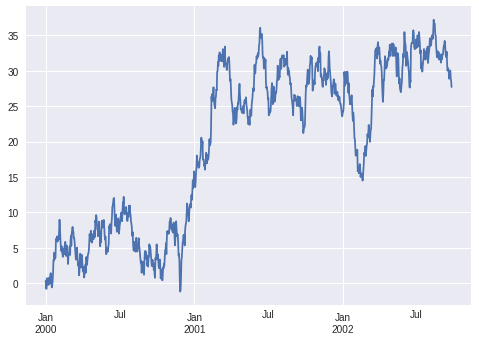

In [17]:
ts.plot()

DataFrame에서 [plot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) 메소드는 레이블에 있는 모든 열을 그릴 때 편리합니다



In [0]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  

In [0]:
df = df.cumsum()

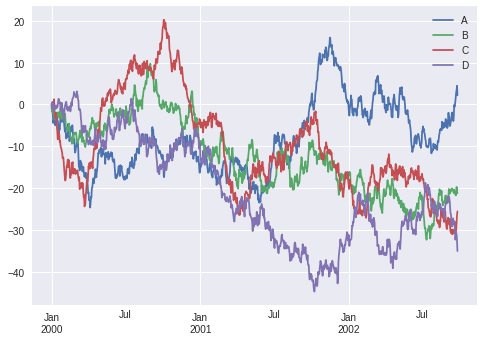

In [20]:
plt.figure(); df.plot(); plt.legend(loc='best')

#Getting Data In/Out

##CSV

[csv 파일에 씁니다.](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [0]:
df.to_csv('foo.csv')

[csv 파일에서 읽습니다.](https://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [22]:
pd.read_csv('foo.csv')

Unnamed: 0         A          B          C          D
0    2000-01-01 -0.026335  -0.717745   0.117218  -0.549751
1    2000-01-02 -1.049763  -1.785373  -0.822755  -0.781237
2    2000-01-03 -1.268265  -0.791013  -0.141242   0.587446
3    2000-01-04 -2.667261  -1.408698   0.240404  -0.705050
4    2000-01-05 -4.471245  -2.303159  -0.314543  -0.252046
5    2000-01-06 -3.832738  -2.485943   0.554620  -1.617591
6    2000-01-07 -3.764604  -2.644763   1.224718  -1.640596
7    2000-01-08 -3.706452  -3.435865  -0.816544  -0.449831
8    2000-01-09 -3.936663  -3.419143  -3.106705  -0.312725
9    2000-01-10 -5.014653  -3.227070  -3.314237  -0.252284
10   2000-01-11 -4.206563  -3.708036  -2.286878  -1.057564
11   2000-01-12 -2.854169  -2.604047  -2.011293  -0.496066
12   2000-01-13 -2.425489  -1.964353  -4.310662  -0.254048
13   2000-01-14 -2.861078  -2.412133  -5.397059  -0.806801
14   2000-01-15 -3.719051  -2.304485  -6.486873  -0.764641
15   2000-01-16 -3.954312  -2.581573  -8.355360  -0.367414
16   2000-01-17 -4.536187  -1.894429  -7.774752   0.640860
17   2000-01-18 -6.213764  -2.279379  -7.626798   1.334903
18   2000-01-19 -5.164765  -2.382773  -6.484147   1.233413
19   2000-01-20 -5.951784  -3.206533  -7.456596   0.322954
20   2000-01-21 -6.094290  -1.806253  -9.041151   0.338585
21   2000-01-22 -4.219268  -2.402346  -8.804568   0.513316
22   2000-01-23 -2.293937  -0.970808  -9.969945  -1.423756
23   2000-01-24 -2.352168  -1.972728 -10.398412  -1.538460
24   2000-01-25 -3.424824  -3.400619 -10.598927  -0.946809
25   2000-01-26 -4.202295  -3.554636 -11.156441   0.381046
26   2000-01-27 -3.952622  -2.975130 -11.532670  -0.797718
27   2000-01-28 -1.792251  -2.364668 -12.882036  -0.858014
28   2000-01-29 -3.438095  -1.666424 -12.658937  -2.489144
29   2000-01-30 -4.057369  -1.405462 -12.806334  -1.991122
..          ...       ...        ...        ...        ...
970  2002-08-28 -3.497089 -21.799331 -27.512780 -23.948642
971  2002-08-29 -3.780051 -23.708894 -28.615803 -23.760478
972  2002-08-30 -4.002507 -21.969386 -29.438393 -23.252988
973  2002-08-31 -4.661825 -22.424417 -29.850030 -23.513799
974  2002-09-01 -5.663649 -22.963628 -27.758539 -23.589569
975  2002-09-02 -5.292332 -23.556915 -28.301622 -22.163613
976  2002-09-03 -3.612934 -22.336902 -27.114755 -23.072718
977  2002-09-04 -2.004994 -21.699757 -28.022481 -22.063717
978  2002-09-05 -3.486140 -20.241942 -28.106275 -22.023699
979  2002-09-06 -2.948154 -20.530027 -28.772999 -22.433141
980  2002-09-07 -5.152315 -21.374976 -27.403556 -23.157017
981  2002-09-08 -5.147801 -20.548175 -29.534911 -24.613610
982  2002-09-09 -4.502910 -20.825335 -30.456955 -26.170400
983  2002-09-10 -4.055736 -20.860546 -30.771489 -26.248800
984  2002-09-11 -3.541193 -20.374508 -29.947598 -27.705778
985  2002-09-12 -2.381324 -20.117239 -30.709171 -29.244136
986  2002-09-13 -1.938442 -20.314696 -31.080254 -27.618574
987  2002-09-14 -2.802669 -20.325638 -29.945957 -28.456105
988  2002-09-15 -3.254465 -20.479762 -30.494301 -27.236968
989  2002-09-16 -4.003399 -20.993692 -30.913225 -28.414765
990  2002-09-17 -2.932438 -21.160098 -30.772429 -28.795505
991  2002-09-18 -0.115537 -20.376504 -29.998241 -27.913785
992  2002-09-19 -0.616637 -21.349927 -30.673046 -28.567137
993  2002-09-20  0.162513 -21.273755 -29.990274 -30.597840
994  2002-09-21  0.825661 -21.142892 -28.226350 -32.383629
995  2002-09-22  1.990832 -21.797458 -30.384845 -31.293541
996  2002-09-23  2.935926 -20.709951 -29.961604 -30.726829
997  2002-09-24  3.447949 -19.751597 -28.357718 -31.180625
998  2002-09-25  4.454119 -20.884311 -26.421078 -32.768527
999  2002-09-26  2.200247 -21.263247 -25.612438 -35.104136

[1000 rows x 5 columns]

##HDF5
[HDFStores](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)에 읽고 씁니다.

HDF5 Store에 씁니다.


In [26]:
df.to_hdf('foo.h5','df')

ImportError: ignored

HDF5 Store에서 읽어옵니다.

In [10]:
pd.read_hdf('foo.h5','df')

FileNotFoundError: ignored

## Excel
[MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)에 읽고 씁니다. 

엑셀 파일에 씁니다. 


In [0]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

엑셀 파일을 읽어옵니다.

In [32]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

A          B          C          D
2000-01-01 -0.026335  -0.717745   0.117218  -0.549751
2000-01-02 -1.049763  -1.785373  -0.822755  -0.781237
2000-01-03 -1.268265  -0.791013  -0.141242   0.587446
2000-01-04 -2.667261  -1.408698   0.240404  -0.705050
2000-01-05 -4.471245  -2.303159  -0.314543  -0.252046
2000-01-06 -3.832738  -2.485943   0.554620  -1.617591
2000-01-07 -3.764604  -2.644763   1.224718  -1.640596
2000-01-08 -3.706452  -3.435865  -0.816544  -0.449831
2000-01-09 -3.936663  -3.419143  -3.106705  -0.312725
2000-01-10 -5.014653  -3.227070  -3.314237  -0.252284
2000-01-11 -4.206563  -3.708036  -2.286878  -1.057564
2000-01-12 -2.854169  -2.604047  -2.011293  -0.496066
2000-01-13 -2.425489  -1.964353  -4.310662  -0.254048
2000-01-14 -2.861078  -2.412133  -5.397059  -0.806801
2000-01-15 -3.719051  -2.304485  -6.486873  -0.764641
2000-01-16 -3.954312  -2.581573  -8.355360  -0.367414
2000-01-17 -4.536187  -1.894429  -7.774752   0.640860
2000-01-18 -6.213764  -2.279379  -7.626798   1.334903
2000-01-19 -5.164765  -2.382773  -6.484147   1.233413
2000-01-20 -5.951784  -3.206533  -7.456596   0.322954
2000-01-21 -6.094290  -1.806253  -9.041151   0.338585
2000-01-22 -4.219268  -2.402346  -8.804568   0.513316
2000-01-23 -2.293937  -0.970808  -9.969945  -1.423756
2000-01-24 -2.352168  -1.972728 -10.398412  -1.538460
2000-01-25 -3.424824  -3.400619 -10.598927  -0.946809
2000-01-26 -4.202295  -3.554636 -11.156441   0.381046
2000-01-27 -3.952622  -2.975130 -11.532670  -0.797718
2000-01-28 -1.792251  -2.364668 -12.882036  -0.858014
2000-01-29 -3.438095  -1.666424 -12.658937  -2.489144
2000-01-30 -4.057369  -1.405462 -12.806334  -1.991122
...              ...        ...        ...        ...
2002-08-28 -3.497089 -21.799331 -27.512780 -23.948642
2002-08-29 -3.780051 -23.708894 -28.615803 -23.760478
2002-08-30 -4.002507 -21.969386 -29.438393 -23.252988
2002-08-31 -4.661825 -22.424417 -29.850030 -23.513799
2002-09-01 -5.663649 -22.963628 -27.758539 -23.589569
2002-09-02 -5.292332 -23.556915 -28.301622 -22.163613
2002-09-03 -3.612934 -22.336902 -27.114755 -23.072718
2002-09-04 -2.004994 -21.699757 -28.022481 -22.063717
2002-09-05 -3.486140 -20.241942 -28.106275 -22.023699
2002-09-06 -2.948154 -20.530027 -28.772999 -22.433141
2002-09-07 -5.152315 -21.374976 -27.403556 -23.157017
2002-09-08 -5.147801 -20.548175 -29.534911 -24.613610
2002-09-09 -4.502910 -20.825335 -30.456955 -26.170400
2002-09-10 -4.055736 -20.860546 -30.771489 -26.248800
2002-09-11 -3.541193 -20.374508 -29.947598 -27.705778
2002-09-12 -2.381324 -20.117239 -30.709171 -29.244136
2002-09-13 -1.938442 -20.314696 -31.080254 -27.618574
2002-09-14 -2.802669 -20.325638 -29.945957 -28.456105
2002-09-15 -3.254465 -20.479762 -30.494301 -27.236968
2002-09-16 -4.003399 -20.993692 -30.913225 -28.414765
2002-09-17 -2.932438 -21.160098 -30.772429 -28.795505
2002-09-18 -0.115537 -20.376504 -29.998241 -27.913785
2002-09-19 -0.616637 -21.349927 -30.673046 -28.567137
2002-09-20  0.162513 -21.273755 -29.990274 -30.597840
2002-09-21  0.825661 -21.142892 -28.226350 -32.383629
2002-09-22  1.990832 -21.797458 -30.384845 -31.293541
2002-09-23  2.935926 -20.709951 -29.961604 -30.726829
2002-09-24  3.447949 -19.751597 -28.357718 -31.180625
2002-09-25  4.454119 -20.884311 -26.421078 -32.768527
2002-09-26  2.200247 -21.263247 -25.612438 -35.104136

[1000 rows x 4 columns]

#Gotchas

작업을 수행하려고 시도하면 다음과 같은 예외 상황을 볼 수도 있습니다 :

In [0]:
if pd.Series([False, True, False]):
print("I was true")

IndentationError: expected an indented block (<ipython-input-80-9074a2390e8e>, line 2)

설명 및 수행 할 작업은 [비교](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare)를 참조하십시오.

[Gotchas](https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas)도 참조하십시오.
